## Crossplots

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import lasio
import numpy as np

In [3]:
plt.style.use(['science','grid', 'no-latex'])

Lectura del archivo LAS

In [4]:
las = lasio.read("W19.las")
well = las.df()

Visualizacion del pozo

C:\Users\inten\.conda\envs\ds\lib\site-packages\matplotlib\ticker.py:2938: RuntimeWarning: invalid value encountered in log10
  majorstep_no_exponent = 10 ** (np.log10(majorstep) % 1)
C:\Users\inten\.conda\envs\ds\lib\site-packages\matplotlib\ticker.py:2938: RuntimeWarning: invalid value encountered in double_scalars
  majorstep_no_exponent = 10 ** (np.log10(majorstep) % 1)


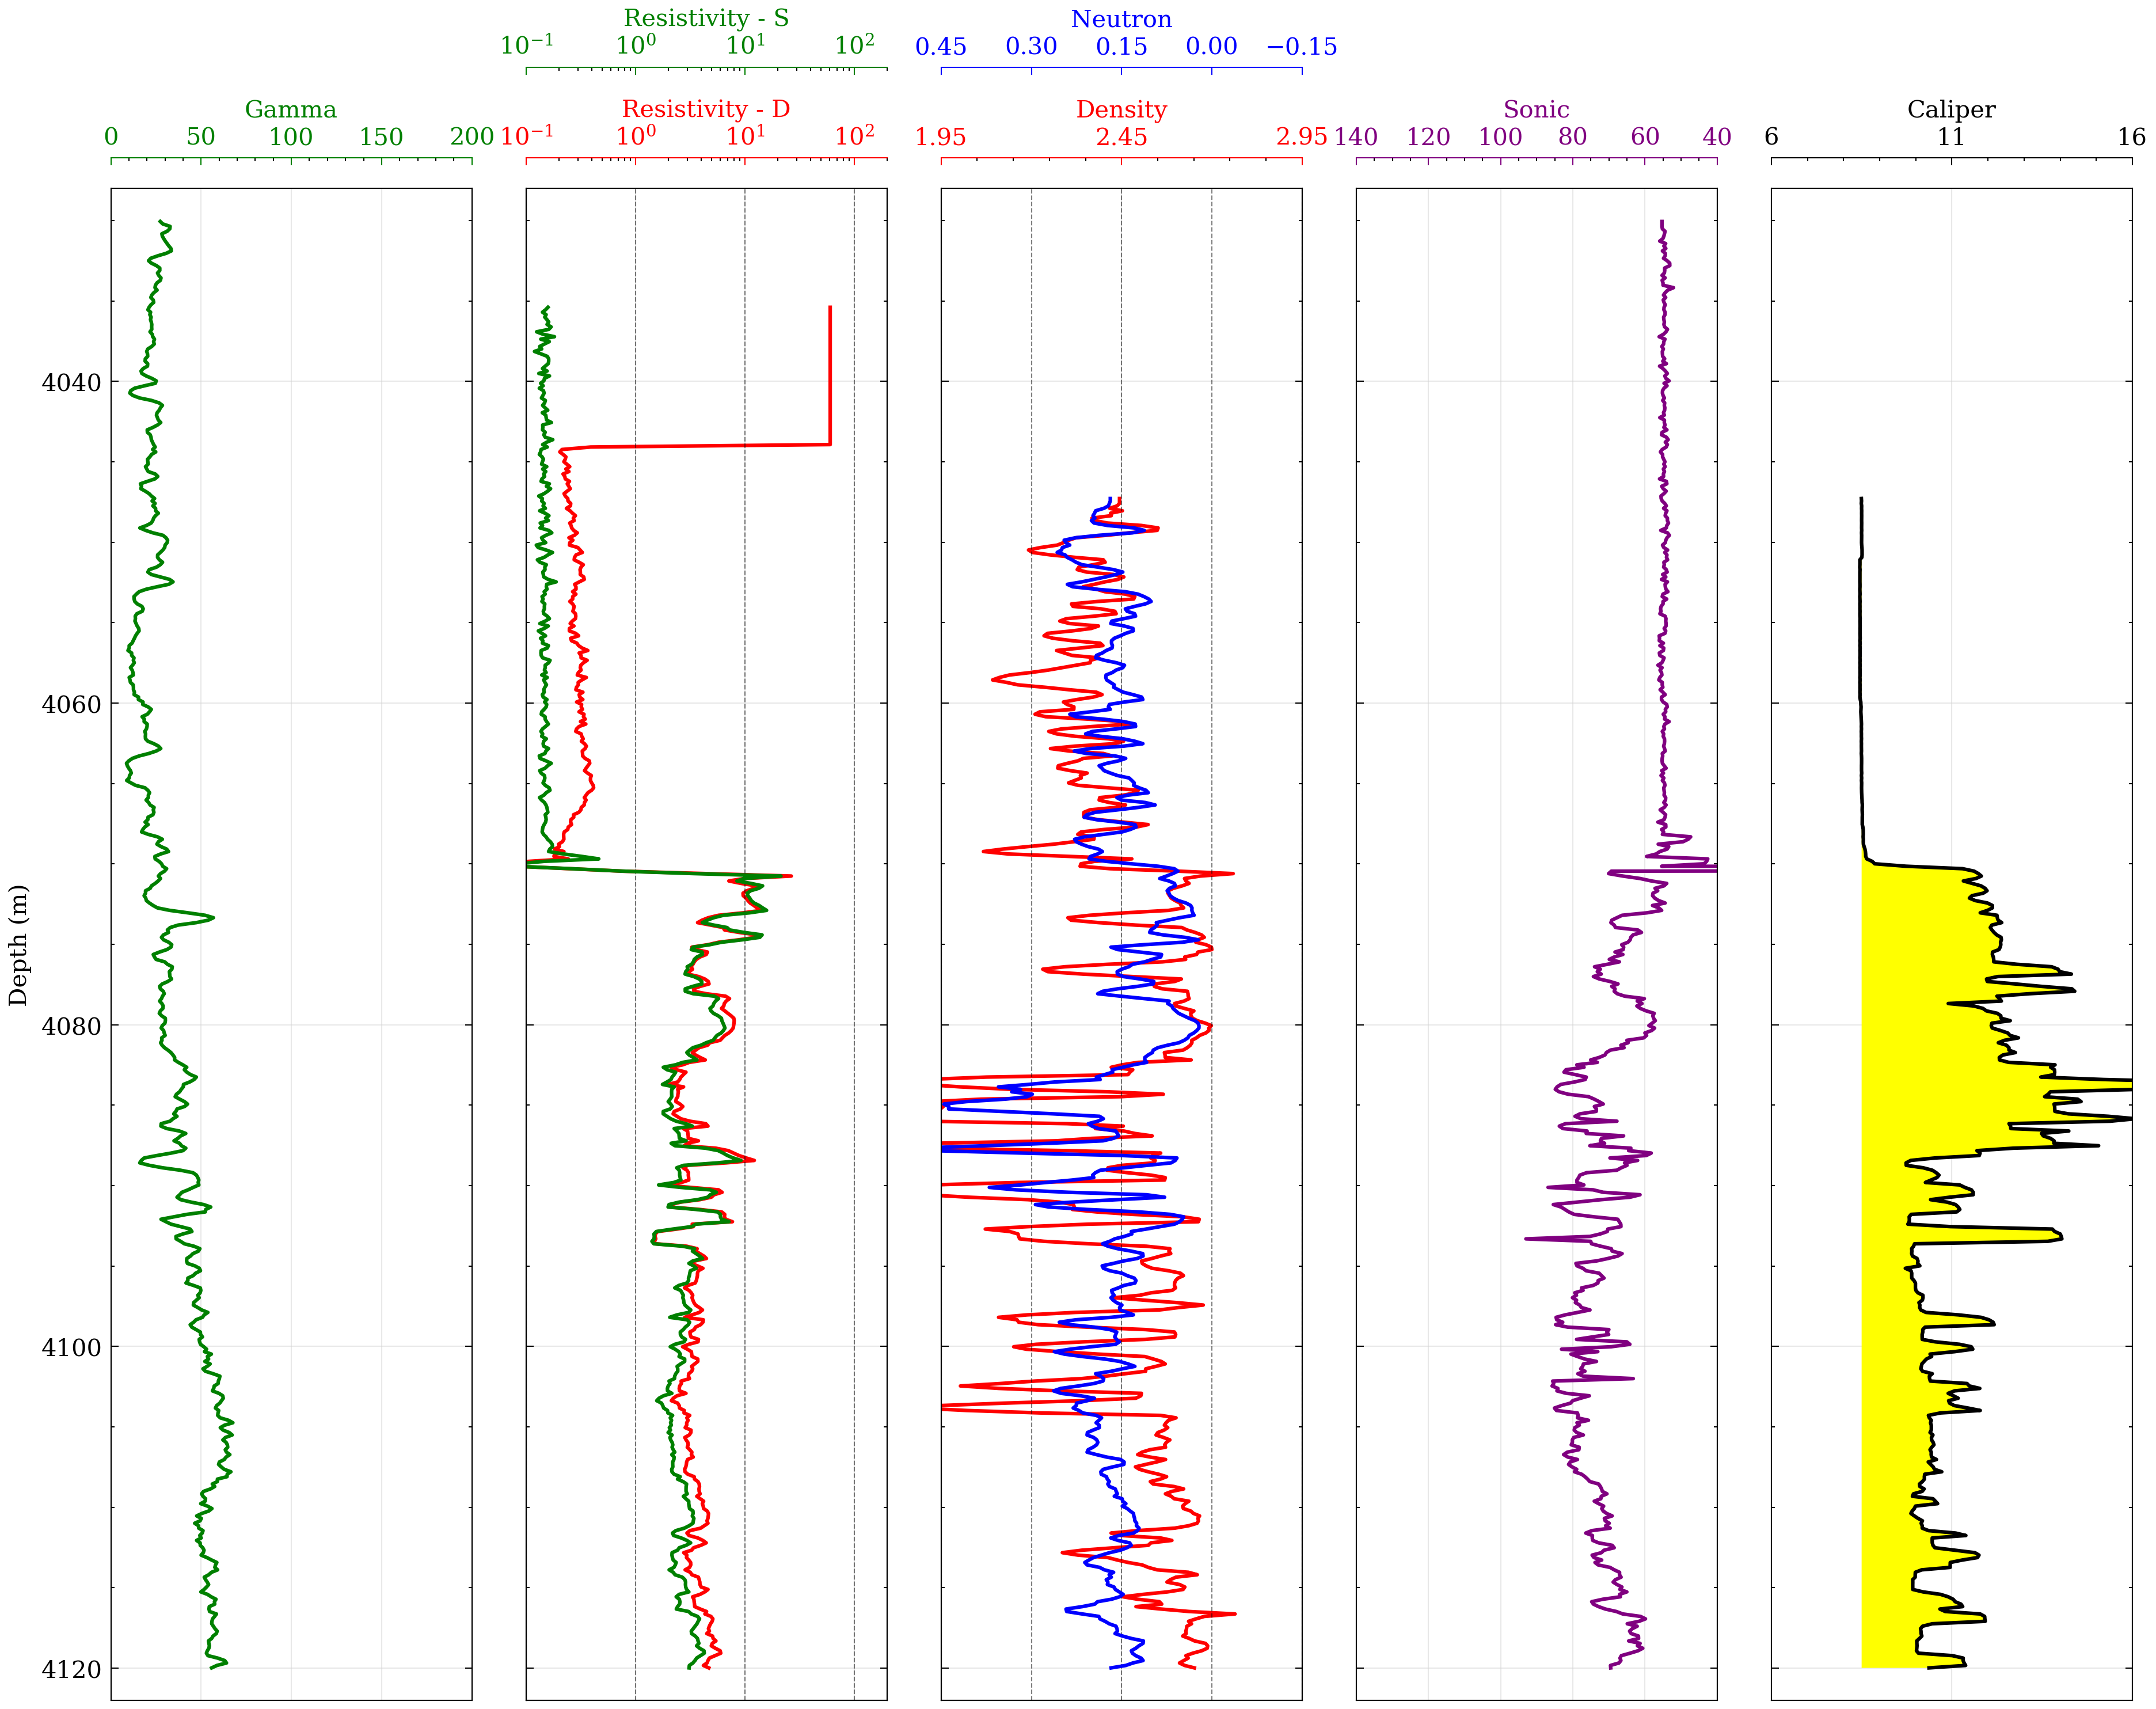

In [5]:
fig, ax = plt.subplots(figsize=(15,10))

ax1 = plt.subplot2grid((1,6), (0,0), rowspan=1, colspan = 1)
ax2 = plt.subplot2grid((1,6), (0,1), rowspan=1, colspan = 1, sharey = ax1)
ax3 = plt.subplot2grid((1,6), (0,2), rowspan=1, colspan = 1, sharey = ax1)
ax4 = plt.subplot2grid((1,6), (0,3), rowspan=1, colspan = 1, sharey = ax1)
ax5 = ax3.twiny()
ax6 = plt.subplot2grid((1,6), (0,4), rowspan=1, colspan = 1, sharey = ax1)
ax7 = ax2.twiny()

ax10 = ax1.twiny()
ax10.xaxis.set_visible(False)
ax11 = ax2.twiny()
ax11.xaxis.set_visible(False)
ax12 = ax3.twiny()
ax12.xaxis.set_visible(False)
ax13 = ax4.twiny()
ax13.xaxis.set_visible(False)
ax14 = ax6.twiny()
ax14.xaxis.set_visible(False)

# Rayos gamma
ax1.plot(well["GR"], well.index, color = "green", linewidth = 1.5)
ax1.set_xlabel("Gamma")
ax1.xaxis.label.set_color("green")
ax1.set_xlim(0, 200)
ax1.set_ylabel("Depth (m)")
ax1.tick_params(axis='x', colors="green")
ax1.spines["top"].set_edgecolor("green")
ax1.title.set_color('green')
ax1.set_xticks([0, 50, 100, 150, 200])

# Resistividad
ax2.plot(well["LLD"], well.index, color = "red", linewidth = 1.5)
ax2.set_xlabel("Resistivity - D")
ax2.set_xlim(0.2, 200)
ax2.xaxis.label.set_color("red")
ax2.tick_params(axis='x', colors="red")
ax2.spines["top"].set_edgecolor("red")
ax2.set_xticks([0.1, 1, 10, 100])
ax2.semilogx()

# Densidad 
ax3.plot(well["RHOB"], well.index, color = "red", linewidth = 1.5)
ax3.set_xlabel("Density")
ax3.set_xlim(1.95, 2.95)
ax3.xaxis.label.set_color("red")
ax3.tick_params(axis='x', colors="red")
ax3.spines["top"].set_edgecolor("red")
ax3.set_xticks([1.95, 2.45, 2.95])

# Sonico
ax4.plot(well["DTCO"], well.index, color = "purple", linewidth = 1.5)
ax4.set_xlabel("Sonic")
ax4.set_xlim(140, 40)
ax4.xaxis.label.set_color("purple")
ax4.tick_params(axis='x', colors="purple")
ax4.spines["top"].set_edgecolor("purple")

# Neutron 
ax5.plot(well["NPHI"], well.index, color = "blue", linewidth = 1.5)
ax5.set_xlabel('Neutron')
ax5.xaxis.label.set_color("blue")
ax5.set_xlim(0.45, -0.15)
ax5.set_ylim(4122, 4028)
ax5.tick_params(axis='x', colors="blue")
ax5.spines["top"].set_position(("axes", 1.08))
ax5.spines["top"].set_visible(True)
ax5.spines["top"].set_edgecolor("blue")
ax5.set_xticks([0.45, 0.3, 0.15,0, -0.15])

# Caliper
ax6.plot(well["CALI"], well.index, color = "black", linewidth = 1.5)
ax6.set_xlabel("Caliper")
ax6.set_xlim(6, 16)
ax6.xaxis.label.set_color("black")
ax6.tick_params(axis='x', colors="black")
ax6.spines["top"].set_edgecolor("black")
ax6.fill_betweenx(well.index, 8.5, well["CALI"], facecolor='yellow')
ax6.set_xticks([6,  11, 16])

# Resistividad somera
ax7.plot(well["LLS"], well.index, color = "green", linewidth = 1.5)
ax7.set_xlabel("Resistivity - S")
ax7.set_xlim(0.2, 200)
ax7.xaxis.label.set_color("green")
ax7.spines["top"].set_position(("axes", 1.08))
ax7.spines["top"].set_visible(True)
ax7.tick_params(axis='x', colors="green")
ax7.spines["top"].set_edgecolor("green")
ax7.set_xticks([0.1, 1, 10, 100])
ax7.semilogx()

for ax in [ax1, ax2, ax3, ax4, ax6]:
    ax.set_ylim(4122, 4028)
    ax.grid(which='major', color='lightgrey', linestyle='-')
    ax.xaxis.set_ticks_position("top")
    ax.xaxis.set_label_position("top")
    ax.spines["top"].set_position(("axes", 1.02))

for ax in [ax2, ax3, ax4, ax6]:
    plt.setp(ax.get_yticklabels(), visible = False)

fig.set_dpi(300)

plt.tight_layout()
fig.subplots_adjust(wspace = 0.15)

Seleccion de la zona 4  >[4103.9795 - 4105.8083]

In [6]:
pozo=well.reset_index()
zona=pozo[['DEPTH','GR','NPHI','RHOB', 'DTCO']].loc[(pozo['DEPTH']>=4103.9795) & (pozo['DEPTH']<4105.8083)]
# Se seleccionan las 4 columnas, donde la profundidad se encuentre en el rango de la zona que nos corresponde
zona=zona.reset_index(drop=True)
zona.tail()

,DEPTH,GR,NPHI,RHOB,DTCO
7,4105.0463,60.6234,0.1871,2.5778,79.4514
8,4105.1987,62.1552,0.1974,2.5676,79.6140
9,4105.3511,65.5765,0.2068,2.5503,78.9172
10,4105.5035,67.2224,0.2075,2.5454,77.0866
11,4105.6559,63.4949,0.1965,2.5659,79.7477


crossplot

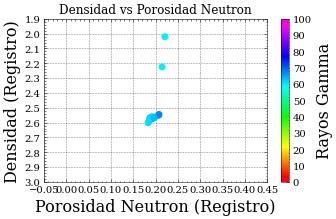

In [7]:
fig, ax = plt.subplots(figsize=(5,3))

plt.scatter(zona.NPHI, zona.RHOB, c=zona.GR, cmap='gist_rainbow')
cbar = plt.colorbar(ticks=np.linspace(0,100,11))
cbar.set_label('Rayos Gamma', size=16)
plt.clim(0,100)

ax.set_ylim(3.0, 1.9)
ax.set_xlim(-0.05, 0.45)
ax.set_yticks(np.linspace(1.9,3.0,12))
ax.set_xticks(np.linspace(-0.05,0.45,11))
ax.set_ylabel('Densidad (Registro)', fontsize=16)
ax.set_xlabel('Porosidad Neutron (Registro)', fontsize=16)
plt.title('Densidad vs Porosidad Neutron')

#fig.set_dpi(300)
#plt.savefig("cph", transparent=True)
plt.show()

Matriz

In [45]:
matriz=pd.DataFrame({
    'substancia':['Cuarzo', 'Calcita', 'Dolomita', 'Agua'],
    'rho':[2.65, 2.71, 2.87, 1.00],
    'np':[-0.02, 0, 0.02, 1.00],
    'dt':[180, 156, 143, 620]
})
matriz

,substancia,rho,np,dt
0,Cuarzo,2.65,-0.02,180
1,Calcita,2.71,0.00,156
2,Dolomita,2.87,0.02,143
3,Agua,1.00,1.00,620


Matriz A

In [49]:
A = np.empty((0,len(matriz)))

for a in range(1, matriz.shape[1]):
    A = np.append(A, [matriz.iloc[:,a].to_numpy()], axis=0)
    
A = np.append(A, [np.ones(matriz.shape[1])], axis=0)
A

array([[ 2.65e+00,  2.71e+00,  2.87e+00,  1.00e+00],
       [-2.00e-02,  0.00e+00,  2.00e-02,  1.00e+00],
       [ 1.80e+02,  1.56e+02,  1.43e+02,  6.20e+02],
       [ 1.00e+00,  1.00e+00,  1.00e+00,  1.00e+00]])

Matriz B

In [50]:
B = np.empty((0,len(matriz)-1))

for a in range(0, zona.shape[0]):
    B = np.append(B, [zona.loc[a,['RHOB', 'NPHI', 'DTCO']].to_numpy()], axis=0)

B = B.T
B = np.append(B, [np.ones(zona.shape[0])], axis=0)
B

array([[ 2.0208,  2.2247,  2.5584,  2.6008,  2.5799,  2.5732,  2.5684,
         2.5778,  2.5676,  2.5503,  2.5454,  2.5659],
       [ 0.221 ,  0.2146,  0.1922,  0.1833,  0.1877,  0.1924,  0.1873,
         0.1871,  0.1974,  0.2068,  0.2075,  0.1965],
       [84.528 , 78.7209, 78.521 , 78.7156, 75.6605, 78.8588, 78.2041,
        79.4514, 79.614 , 78.9172, 77.0866, 79.7477],
       [ 1.    ,  1.    ,  1.    ,  1.    ,  1.    ,  1.    ,  1.    ,
         1.    ,  1.    ,  1.    ,  1.    ,  1.    ]])

Matriz X

In [44]:
x = np.empty((0,len(matriz)))
for a in range(0,B.shape[1]):
    x = np.append(x,[np.linalg.solve(A,B[:,a].T)], axis=0)

Solucion=pd.DataFrame(x,columns=['Cuarzo', 'Calcita', 'Dolomita', 'Porosidad'], index=zona['DEPTH'])
Solucion

,Cuarzo,Calcita,Dolomita,Porosidad
DEPTH,,,,
4103.9795,-9.332626,16.305565,-6.129884,0.156945
4104.1319,-8.473817,14.054008,-4.719709,0.139518
4104.2843,-6.512165,9.652352,-2.247085,0.106898
4104.4367,-6.180982,9.028847,-1.946475,0.098610
4104.5891,-6.476063,9.533202,-2.158487,0.101348
4104.7415,-6.423961,9.443842,-2.126329,0.106447
4104.8939,-6.416820,9.506496,-2.192489,0.102813
4105.0463,-6.310945,9.302664,-2.094490,0.102771
4105.1987,-6.478532,9.505559,-2.137609,0.110582
